# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import scipy.stats as stats

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
# Load data set (NYC airbnb data)
    # I've chosen to load the data with only the columns that I deem fit to become features for the model
filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
df = pd.read_csv(filename, 
                header = 0,
                usecols = [15, 16, 17, 18, 20, 37],
                names = ["accomodates", "bathrooms", 
                         "bedrooms", "beds", "price",
                         "review_scores_rating"])

df.head()

,accomodates,bathrooms,bedrooms,beds,price,review_scores_rating
0,1,1.0,NaN,1.0,150.0,4.70
1,3,1.0,1.0,3.0,75.0,4.45
2,4,1.5,2.0,2.0,275.0,5.00
3,2,1.0,1.0,1.0,68.0,4.21
4,1,1.0,1.0,1.0,75.0,4.91


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
# Column Names and dTypes (model features)
df.dtypes

accomodates               int64
bathrooms               float64
bedrooms                float64
beds                    float64
price                   float64
review_scores_rating    float64
dtype: object

In [5]:
# Skim the data distribution
df.describe(include = 'all')

,accomodates,bathrooms,bedrooms,beds,price,review_scores_rating
count,28022.000000,28022.000000,25104.000000,26668.000000,28022.000000,28022.000000
mean,2.874491,1.142174,1.329708,1.629556,154.228749,4.683482
std,1.860251,0.421132,0.700726,1.097104,140.816605,0.505857
min,1.000000,0.000000,1.000000,1.000000,29.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,70.000000,4.600000
50%,2.000000,1.000000,1.000000,1.000000,115.000000,4.830000
75%,4.000000,1.000000,1.000000,2.000000,180.000000,5.000000
max,16.000000,8.000000,12.000000,21.000000,1000.000000,5.000000


In [6]:
# Check for missing values
df.isnull().head()

,accomodates,bathrooms,bedrooms,beds,price,review_scores_rating
0,False,False,True,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [7]:
# What columns contain missing values?
nan_count = np.sum(df.isnull(), axis = 0)

condition = nan_count != 0             # look for all columns with missing values
col_names = nan_count[condition].index # get the column names
nan_cols  = list(col_names)            # convert column names to list
print(nan_cols)

['bedrooms', 'beds']


In [8]:
# Before replacing missing values:
print(np.sum(df[nan_cols].isnull(), axis = 0))
df[nan_cols]

bedrooms    2918
beds        1354
dtype: int64


,bedrooms,beds
0,NaN,1.0
1,1.0,3.0
2,2.0,2.0
3,1.0,1.0
4,1.0,1.0
...,...,...
28017,1.0,1.0
28018,2.0,2.0
28019,1.0,1.0
28020,1.0,2.0


In [9]:
# Replace missing values 
    # I chose to replace rather than impute the missing values to conserve as much data as possible
columns_to_fill = ['bedrooms', 'beds']

for column in columns_to_fill:
    mean_value = df[column].mean()
    df[column].fillna(value = mean_value, inplace = True)

In [10]:
# After replacing missing values:
print(np.sum(df[nan_cols].isnull(), axis = 0))
df[nan_cols]

bedrooms    0
beds        0
dtype: int64


,bedrooms,beds
0,1.329708,1.0
1,1.000000,3.0
2,2.000000,2.0
3,1.000000,1.0
4,1.000000,1.0
...,...,...
28017,1.000000,1.0
28018,2.000000,2.0
28019,1.000000,1.0
28020,1.000000,2.0


In [11]:
# Create winsorized "price" column for the label
    # Any overly expensive listings will be removed, leaving the top 99.9% of listings
df['label'] = stats.mstats.winsorize(df['price'], limits = [0.01, 0.01])

In [12]:
# Prepared data:
df.head()

,accomodates,bathrooms,bedrooms,beds,price,review_scores_rating,label
0,1,1.0,1.329708,1.0,150.0,4.70,150.0
1,3,1.0,1.000000,3.0,75.0,4.45,75.0
2,4,1.5,2.000000,2.0,275.0,5.00,275.0
3,2,1.0,1.000000,1.0,68.0,4.21,68.0
4,1,1.0,1.000000,1.0,75.0,4.91,75.0


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [13]:
# Creating label & features
y = df['label']
X = df.drop(columns = 'label', axis = 1)

print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))
print(str(list(X.columns)))

Number of examples: 28022

Number of Features:6
['accomodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'review_scores_rating']


In [14]:
# Create training/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [15]:
# Creating the model
def train_test_knn(X_train,X_test, y_train, y_test, k):
    
    # Initialize the model
    model = KNeighborsClassifier(k)
    
    # Fit the model to training data
    model.fit(X_train, y_train)
    
    # Make predictions on test data
    class_label_predictions = model.predict(X_test)
    
    # Compute the accuracy score
    acc_score = accuracy_score(y_test, class_label_predictions)
    
    return acc_score

In [16]:
# Test the model
k_values = np.arange(1, 31).tolist()
test = []
for k in k_values:
    score = train_test_knn(X_train, X_test, y_train, y_test, k)
    print('k = ' + str(k) + ', accuracy score: ' + str(score))
    test.append(float(score))

k = 1, accuracy score: 0.9282783229259589
k = 2, accuracy score: 0.9143621766280107
k = 3, accuracy score: 0.9136485280999108
k = 4, accuracy score: 0.912042818911686
k = 5, accuracy score: 0.9107939339875112
k = 6, accuracy score: 0.9059768064228367
k = 7, accuracy score: 0.9027653880463872
k = 8, accuracy score: 0.8993755575379125
k = 9, accuracy score: 0.895450490633363
k = 10, accuracy score: 0.8909901873327386
k = 11, accuracy score: 0.8899197145405887
k = 12, accuracy score: 0.8863514719000892
k = 13, accuracy score: 0.8833184656556646
k = 14, accuracy score: 0.8815343443354148
k = 15, accuracy score: 0.8785013380909902
k = 16, accuracy score: 0.8765388046387155
k = 17, accuracy score: 0.8729705619982159
k = 18, accuracy score: 0.8695807314897414
k = 19, accuracy score: 0.8672613737734166
k = 20, accuracy score: 0.8633363068688671
k = 21, accuracy score: 0.8610169491525423
k = 22, accuracy score: 0.8590544157002676
k = 23, accuracy score: 0.856199821587868
k = 24, accuracy score:

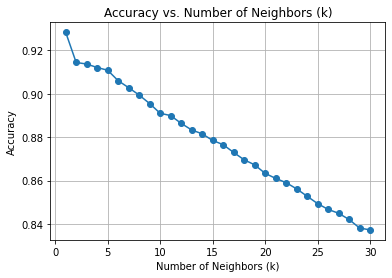

In [17]:
# Plot the accuracy scores
    #According to the results, this model's performance increases as the number of neighbors decreases
plt.plot(k_values, test, marker='o')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [18]:
# Cross-Validation using KFold approach
model = KNeighborsClassifier(n_neighbors = 3)
num_folds = 5
folds = KFold(n_splits = num_folds, random_state=None)

acc_scores = []

for train_row_index , test_row_index in folds.split(X_train): 
    
    # New X_train and X_val
    X_train_new  = X_train.iloc[train_row_index] 
    X_val = X_train.iloc[test_row_index]
    
    # New y_train and y_val
    y_train_new = y_train.iloc[train_row_index]
    y_val = y_train.iloc[test_row_index]
    
    # Fit the model
    model.fit(X_train_new, y_train_new)
    predictions = model.predict(X_val)
    
    # Calculate accuracy scores
    iteration_accuracy = accuracy_score(predictions , y_val)
    acc_scores.append(iteration_accuracy)
     
# Format print 
for i in range(len(acc_scores)):
    print('Accuracy score for iteration {0}: {1}'.format(i+1, acc_scores[i]))

avg_scores = sum(acc_scores)/num_folds
print('\nAverage accuracy score: {}'.format(avg_scores))

Accuracy score for iteration 1: 0.9212756467439785
Accuracy score for iteration 2: 0.9112399643175736
Accuracy score for iteration 3: 0.9089895159491412
Accuracy score for iteration 4: 0.9080972563015838
Accuracy score for iteration 5: 0.9185813071603837

Average accuracy score: 0.9136367380945322
